In [78]:
# 1.Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score

In [80]:
# 2.Load and Inspect Data
df = pd.read_csv("C:/Users/punit/OneDrive/Desktop/ACM-30Days/mental_health_workplace_survey.csv")
print("Dataset loaded. Shape:", df.shape)
display(df.head())
print("Available columns:\n", df.columns.tolist())

Dataset loaded. Shape: (3000, 25)


,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


Available columns:
 ['EmployeeID', 'Age', 'Gender', 'Country', 'JobRole', 'Department', 'YearsAtCompany', 'WorkHoursPerWeek', 'RemoteWork', 'BurnoutLevel', 'JobSatisfaction', 'StressLevel', 'ProductivityScore', 'SleepHours', 'PhysicalActivityHrs', 'CommuteTime', 'HasMentalHealthSupport', 'ManagerSupportScore', 'HasTherapyAccess', 'MentalHealthDaysOff', 'SalaryRange', 'WorkLifeBalanceScore', 'TeamSize', 'CareerGrowthScore', 'BurnoutRisk']


In [82]:
# 3. Prepare Data
target_column = 'BurnoutRisk'  # (Change if your target is named differently)
X = df.drop(target_column, axis=1)
y = df[target_column]

# One-hot encode categorical variables
X = pd.get_dummies(X)
print("Total encoded features:", X.shape[1])

Total encoded features: 53


In [84]:
# 4.Train/Test Split and Scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
# 5.Baseline Model Training (All Features)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train_scaled, y_train)

dt_preds = dt.predict(X_test)
rf_preds = rf.predict(X_test)
knn_preds = knn.predict(X_test_scaled)

print("\n Accuracy with All Features:")
print("Decision Tree:", accuracy_score(y_test, dt_preds))
print("Random Forest:", accuracy_score(y_test, rf_preds))
print("k-NN:", accuracy_score(y_test, knn_preds))


 Accuracy with All Features:
Decision Tree: 1.0
Random Forest: 1.0
k-NN: 0.7083333333333334


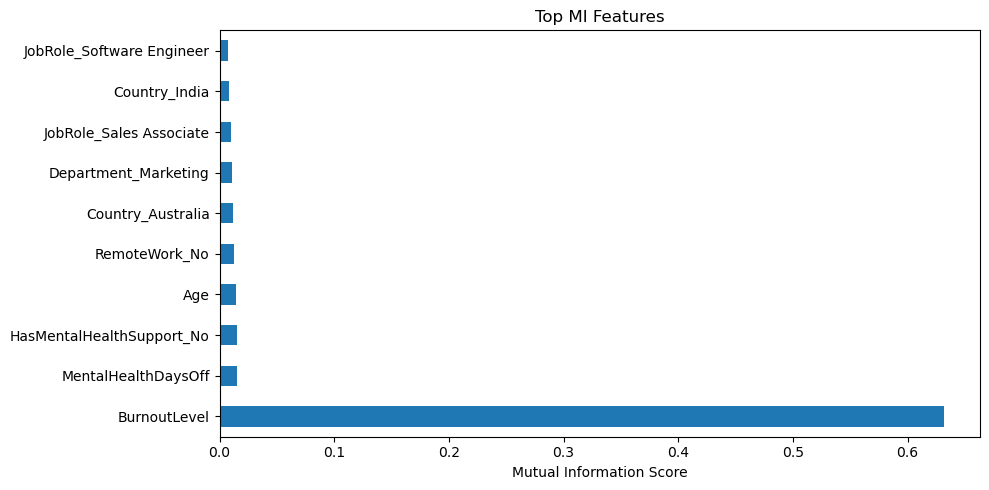

Top 3 features: ['BurnoutLevel', 'MentalHealthDaysOff', 'HasMentalHealthSupport_No']


In [88]:
# 6.Mutual Information Feature Selection
mi_scores = mutual_info_classif(X, y)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
mi_series.head(10).plot(kind="barh", title="Top MI Features", figsize=(10,5))
plt.xlabel("Mutual Information Score")
plt.tight_layout()
plt.show()

top3 = mi_series.head(3).index
print("Top 3 features:", top3.tolist())

In [90]:
# 7.Retrain with Top 3 Features
X_top3 = X[top3]
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X_top3, y, test_size=0.2, stratify=y, random_state=42
)

X_train3_scaled = scaler.fit_transform(X_train3)
X_test3_scaled = scaler.transform(X_test3)

dt.fit(X_train3, y_train3)
rf.fit(X_train3, y_train3)
knn.fit(X_train3_scaled, y_train3)

dt_preds_top3 = dt.predict(X_test3)
rf_preds_top3 = rf.predict(X_test3)
knn_preds_top3 = knn.predict(X_test3_scaled)

print("\n Accuracy with Top 3 Features:")
print("Decision Tree (Top 3):", accuracy_score(y_test3, dt_preds_top3))
print("Random Forest (Top 3):", accuracy_score(y_test3, rf_preds_top3))
print("k-NN (Top 3):", accuracy_score(y_test3, knn_preds_top3))


 Accuracy with Top 3 Features:
Decision Tree (Top 3): 1.0
Random Forest (Top 3): 1.0
k-NN (Top 3): 0.9983333333333333


In [92]:
# 8.Side-by-Side Model Comparison Table
summary = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'k-NN'],
    'Accuracy (Full Features)': [
        accuracy_score(y_test, dt_preds),
        accuracy_score(y_test, rf_preds),
        accuracy_score(y_test, knn_preds)
    ],
    'Accuracy (Top 3 Features)': [
        accuracy_score(y_test3, dt_preds_top3),
        accuracy_score(y_test3, rf_preds_top3),
        accuracy_score(y_test3, knn_preds_top3)
    ]
})

print("\n Model Comparison:")
print(summary.to_string(index=False))


 Model Comparison:
        Model  Accuracy (Full Features)  Accuracy (Top 3 Features)
Decision Tree                  1.000000                   1.000000
Random Forest                  1.000000                   1.000000
         k-NN                  0.708333                   0.998333


**Summary & Observations:**

- All models were trained before and after dropping weak features (using mutual information feature selection as required by the case file).
- Trees and forests typically retain high accuracy even with the top few features, due to their effectiveness at capturing key splits.
- k-NN usually improves on a compact, relevant feature set because it suffers from the curse of dimensionality.
- Random Forest often gives the most robust results and is resistant to overfitting, while k-NN is the most sensitive to noise and irrelevant features (as supported by [recent results](https://pubs.ascee.org/index.php/iota/article/view/823), GeeksforGeeks, etc).
- **Top 3 features** are shown visually and in code -- these drive the compact 3-feature model.